In [2]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt 
# from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split,cross_val_score
#from Orange.classification import tree

In [3]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

In [4]:
Data.isnull().any();

In [5]:
df1 = Data.dropna(axis=0,how='any')
#Data = Data.fillna(method='ffill')
Y = df1['Class']
X = df1.drop('Class', axis = 1)

In [7]:
df1.corr();#no funciona porque el target es categórico

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


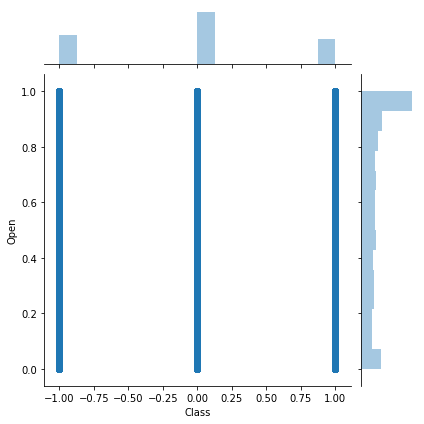

In [6]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="Class",y="Open",data=df1)

In [12]:
df1.shape
len(df1)
#len(df1.columns)

4075

In [22]:
Epsilon = 0.2
delta = 0.1
h_aprox = len(df1.columns)
dimVC =h_aprox   # Poner aqui la dimVC
def n_est(Epsilon,delta,h_aprox):
    return int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
     
n=n_est(Epsilon,delta,h_aprox)
step=10
n

33

### $\eta$ minimo estimado

In [14]:
X.shape[0]

4075

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics,model_selection

#cross_val_score, cross_val_predict


In [68]:
Accuracy= []
scores=[]
lm = LinearRegression() 
for i in range (n,int(len(df1)*0.6),step):
    X1_tr, X1_t, Y1_tr, Y1_t = train_test_split(X, Y,test_size= i/X.shape[0]*0.4/0.6, train_size = i/X.shape[0], random_state=19)
    X1_va, X1_ts, Y1_va, Y1_ts = train_test_split(X1_t, Y1_t, test_size = 0.5, train_size = 0.5, random_state=19)
    model = lm.fit(X1_tr, Y1_tr)
    predictions = lm.predict(X1_ts)
    Accuracy.append(metrics.r2_score(Y1_ts, predictions))
    scores.append(cross_val_score(model, X1_ts, Y1_ts, cv=6))
len(Accuracy)

242

In [64]:
a = []
for i in range(0,len(scores)): #len(N)-1
    i=n+i*step
    a.append(i)
N=list(range(len(scores)))

In [65]:
len(scores)

242

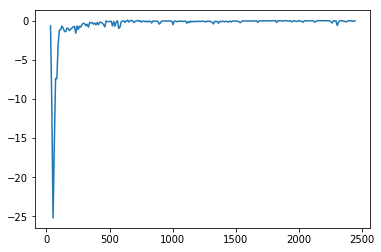

In [69]:
plt.plot(a,Accuracy)

In [16]:
df1.describe()

,Class,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,Ope_Max,Hig_Max,Low_Max,Vol_Min,Clo_Min,Ope_Min,Hig_Min,Low_Min,Support,Resistance
count,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,...,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000
mean,-0.036319,0.590257,0.580197,0.589019,0.592268,0.344043,0.541117,0.722314,0.496906,0.638600,...,0.723613,0.721381,0.721504,0.546550,0.726893,0.723613,0.721381,0.721504,0.684468,0.393750
std,0.712575,0.326031,0.337365,0.328892,0.327860,0.240709,0.233415,0.313028,0.300572,0.225858,...,0.294296,0.303761,0.300488,0.288637,0.294071,0.294296,0.303761,0.300488,0.283691,0.278469
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.315708,0.277357,0.311266,0.316808,0.166706,0.391286,0.545536,0.245324,0.506869,...,0.546861,0.536755,0.539257,0.333115,0.556980,0.546861,0.536755,0.539257,0.512814,0.167924
50%,0.000000,0.635394,0.625498,0.636634,0.637622,0.292758,0.553456,0.875003,0.497192,0.678596,...,0.823513,0.833252,0.829943,0.534658,0.830793,0.823513,0.833252,0.829943,0.770584,0.349522
75%,0.000000,0.898464,0.905599,0.900373,0.904023,0.477052,0.702674,0.955035,0.746276,0.807013,...,0.983995,0.993983,0.992667,0.773139,0.991234,0.983995,0.993983,0.992667,0.923285,0.573778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
X2_tr, X2_t, Y2_tr, Y2_t = train_test_split(X, Y,test_size= 0.4, train_size =0.6, random_state=19)
X2_va, X2_ts, Y2_va, Y2_ts = train_test_split(X2_t, Y2_t, test_size = 0.5, train_size = 0.5, random_state=19)

In [71]:
regressor = LinearRegression()  
regressor.fit(X2_tr,Y2_tr) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
#To retrieve the intercept:
print(regressor.intercept_);
#For retrieving the slope:
print(regressor.coef_);

-0.09753662608640082
[ 5.11023477e-01 -6.20544743e-02 -8.51246678e-01 -9.38279334e+12
  8.96124146e-02 -2.31086878e-01 -2.41510088e-02 -1.96254307e-02
 -1.35012024e-01 -9.44824219e-02  1.92977905e-01  1.11022949e-01
  9.32617188e-02  2.79052734e-01 -6.34765625e-03  7.59887695e-03
 -1.05627441e+00  1.42712402e+00  8.16406250e-01  9.52148438e-03
 -2.63671875e-02  5.49316406e-03  5.71289062e-01 -7.91809082e-01
 -4.14794922e-01 -8.08837891e-01 -4.98046875e-01 -3.75976562e-02
 -6.77490234e-02 -1.16577148e-02  1.59692383e+00 -7.04345703e-02
  2.58056641e-01  3.68774414e-01 -1.19580078e+00 -1.69677734e-02
 -8.02001953e-02  1.60156250e-01  1.03027344e-01 -1.53564453e-01
  2.44140625e-03  1.28173828e-02 -2.24487305e-01 -2.51220703e-01
 -2.66601562e-01  4.29870605e-01 -1.50543213e-01 -1.65039062e-01
 -3.65756078e+12  5.02685547e-01  3.65756078e+12 -1.67602539e-01
  8.39086914e+00 -8.48388672e+00  9.38279334e+12 -3.09285083e+12
  1.45351121e+12  6.62115425e+12 -3.74549343e+12  5.52032576e+12
  3.

In [73]:
y_pred = regressor.predict(X2_ts)

In [74]:
df = pd.DataFrame({'Actual': Y2_ts, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
Date,,
2012-05-29,1,0.150343
2014-05-12,1,-0.016389
2000-08-25,0,-0.267189
2000-06-26,1,-0.584147
2016-11-11,0,-0.294982


In [75]:
y_pred;

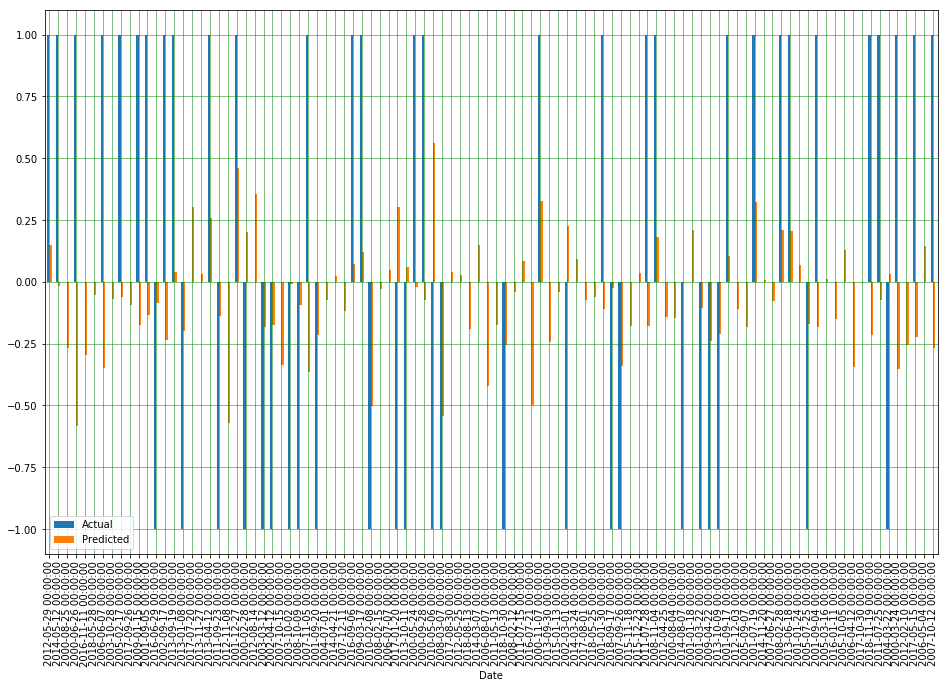

In [76]:
df2 = df.head(100)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [35]:
len(X2_ts)

815

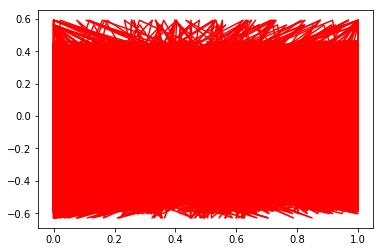

In [36]:
#plt.scatter(X2_ts, Y2_ts,  color='gray')
plt.plot(X2_ts, y_pred, color='red') #, linewidth=2
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_ts, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y2_ts, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_ts, y_pred)))

Mean Absolute Error: 0.38093400701719826
Mean Squared Error: 0.20362930658941894
Root Mean Squared Error: 0.45125304053204884


In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df;

# Regresion logística

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from matplotlib import pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
# import the class
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [42]:
# Binarize the output no se utiliza
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]
n_classes

3

In [47]:
Xb_tr, Xb_o, Yb_tr, Yb_o = train_test_split(X, Y,test_size=0.4,train_size=0.6,random_state=19)  
Xb_va, Xb_ts, Yb_va, Yb_ts = train_test_split(Xb_o, Yb_o, test_size=0.5, train_size = 0.5, random_state=19)  

In [106]:
# use the model to make predictions with the test data
y_pred = model.predict(Xb_ts)
# how did our model perform?
count_misclassified = (Yb_ts != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Yb_ts, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 379
Accuracy: 0.53


In [ ]:
#otra opcion


In [94]:
#no sirve clf.predict(X[:2, :])

In [97]:
# fit the model with data
clf.fit(Xb_tr,Yb_tr)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\l

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [149]:
y_pred_lg=logreg.predict(Xb_ts)
Precision=precision_score(y_pred_lg, Yb_ts, average='macro')  
Recall=recall_score(Yb_ts, y_pred_lg, average='micro')
f1_score=f1_score(Yb_ts, y_pred_lg, average='weighted')  
fbeta_score=fbeta_score(Yb_ts, y_pred_lg, average='macro', beta=0.5)  
precision_recall_fscore_support=precision_recall_fscore_support(Yb_ts, y_pred_lg, beta=0.5, average=None)


NotFittedError: This LogisticRegression instance is not fitted yet

In [51]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y2_ts, y_pred_lg)
cnf_matrix

array([[ 52, 114,  15],
       [ 47, 354,  23],
       [ 57, 125,  28]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

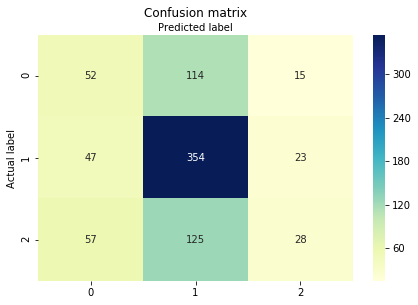

In [52]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
print("Accuracy:",metrics.accuracy_score(Y2_ts, y_pred_lg))
print("Precision:",metrics.precision_score(Y2_ts, y_pred_lg,average="micro"))
print("Recall:",metrics.recall_score(Y2_ts, y_pred_lg,average="micro"))

Accuracy: 0.5325153374233129
Precision: 0.5325153374233129
Recall: 0.5325153374233129


In [108]:
#INTENTANDO QUE RECONOZCA TRES ESTADOS
LR_m=LogisticRegression(multi_class="multinomial",solver ="newton-cg").fit(X2_tr,Y2_tr)
#
y_pred_LM=LR_m.predict(X2_ts)

In [116]:
cnf_matrix_m = metrics.confusion_matrix(Y2_ts, y_pred_LM)
cnf_matrix_m

array([[ 51, 113,  17],
       [ 48, 351,  25],
       [ 54, 123,  33]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

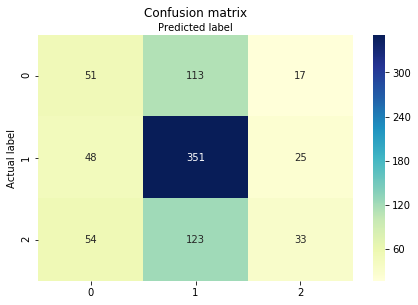

In [110]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score
from sklearn.metrics import f1_score,fbeta_score,precision_recall_fscore_support

In [125]:
Precision=precision_score(y_pred_LM, Y2_ts, average='macro')  
Recall=recall_score(Y2_ts, y_pred_LM, average='micro')
f1_score=f1_score(Y2_ts, y_pred_LM, average='weighted')  
fbeta_score=fbeta_score(Y2_ts, y_pred_LM, average='macro', beta=0.5)  
precision_recall_fscore_support=precision_recall_fscore_support(Y2_ts, y_pred_LM, beta=0.5, average=None)

In [146]:
print('precisión:' , Precision)
print('Recall:' ,Recall)
print('f1_score  :' , f1_score)
print('fbeta_score  :' , fbeta_score)
print('precision_recall_fscore_support:' ,precision_recall_fscore_support)


precisión: 0.4222470005410692
Recall: 0.5337423312883436
f1_score  : 0.488731930795247
fbeta_score  : 0.426069992367003
precision_recall_fscore_support: (array([0.33333333, 0.59795571, 0.44      ]), array([0.28176796, 0.82783019, 0.15714286]), array([0.32156368, 0.63311688, 0.32352941]), array([181, 424, 210], dtype=int64))


In [148]:
target_names = ['Vender', 'Esperar', 'Comprar']
print(classification_report(Y2_ts, y_pred_LM, target_names=target_names))

              precision    recall  f1-score   support

      Vender       0.33      0.28      0.31       181
     Esperar       0.60      0.83      0.69       424
     Comprar       0.44      0.16      0.23       210

   micro avg       0.53      0.53      0.53       815
   macro avg       0.46      0.42      0.41       815
weighted avg       0.50      0.53      0.49       815

